In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
calendar_df = pd.read_csv('drive/MyDrive/Rakamin/Dataset Final Project/calendar.csv')
listings_df = pd.read_csv('drive/MyDrive/Rakamin/Dataset Final Project/listings.csv')
reviews_df = pd.read_csv('drive/MyDrive/Rakamin/Dataset Final Project/reviews.csv')

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import patsy
import statsmodels.api as sm

#Import model
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Remove currency symbols and convert 'price' to numeric in listings_df
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Remove currency symbols and convert 'price' to numeric in calendar_df
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Fill missing values with median in calendar_df
calendar_df['price'].fillna(calendar_df['price'].median(), inplace=True)

# Fill missing values in listings_df
listings_df['reviews_per_month'].fillna(listings_df['reviews_per_month'].median(), inplace=True)

# Fill missing values in reviews_df
reviews_df['comments'].fillna('No Comments', inplace=True)

# Check missing values after handling
calendar_missing_values_after = calendar_df.isnull().sum()
listings_missing_values_after = listings_df.isnull().sum()
reviews_missing_values_after = reviews_df.isnull().sum()

# Display results after filling missing values
print("Missing values after handling:")
print(calendar_missing_values_after)
print(listings_missing_values_after)
print(reviews_missing_values_after)

# Convert 'date' columns to datetime
calendar_df['date'] = pd.to_datetime(calendar_df['date'], errors='coerce')
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')

# Standardize categorical values in 'room_type'
listings_df['room_type'] = listings_df['room_type'].str.strip().str.lower()

# Remove extra spaces in 'reviewer_name'
reviews_df['reviewer_name'] = reviews_df['reviewer_name'].str.strip().str.title()

# Check for duplicates
print("Duplikasi pada calendar_df:", calendar_df.duplicated().sum())
print("Duplikasi pada listings_df:", listings_df.duplicated().sum())
print("Duplikasi pada reviews_df:", reviews_df.duplicated().sum())

# Drop duplicates based on the correct column name
listings_df.drop_duplicates(subset=['id'], inplace=True)
reviews_df.drop_duplicates(subset=['reviewer_id'], inplace=True)

# Check statistics after cleaning
print("Statistik setelah pembersihan calendar_df:")
print(calendar_df.describe())

print("Statistik setelah pembersihan listings_df:")
print(listings_df.describe())

print("Statistik setelah pembersihan reviews_df:")
print(reviews_df.describe())

# Check for duplicates after cleaning
print("Duplikasi setelah pembersihan calendar_df:", calendar_df.duplicated().sum())
print("Duplikasi setelah pembersihan listings_df:", listings_df.duplicated().sum())
print("Duplikasi setelah pembersihan reviews_df:", reviews_df.duplicated().sum())

# Check missing values after cleaning
print("Missing values setelah pembersihan calendar_df:")
print(calendar_df.isnull().sum())

print("Missing values setelah pembersihan listings_df:")
print(listings_df.isnull().sum())

print("Missing values setelah pembersihan reviews_df:")
print(reviews_df.isnull().sum())


Missing values after handling:
listing_id    0
date          0
available     0
price         0
dtype: int64
id                                  0
listing_url                         0
scrape_id                           0
last_scraped                        0
name                                0
                                   ..
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
Length: 92, dtype: int64
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64
Duplikasi pada calendar_df: 0
Duplikasi pada listings_df: 0
Duplikasi pada reviews_df: 0
Statistik setelah pembersihan calendar_df:
         listing_id                           date         price
count  1.393570e+06                        1393570  1.393570e+06
mean   5.550111e+06  2016-07-04 00:00:00.000000256  1.284107

# **1.	Final Model Testing **

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost Regressor model with default parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict with the trained model
y_xgb_pred = xgb_model.predict(X_test)

# Calculate MAE and RMSE for the model
xgb_mae = mean_absolute_error(y_test, y_xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_xgb_pred))

print(f"Mean Absolute Error (MAE) for XGBoost: {xgb_mae}")
print(f"Root Mean Squared Error (RMSE) for XGBoost: {xgb_rmse}")

# Define function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Compute MAPE for the model
xgb_mape = mean_absolute_percentage_error(y_test, y_xgb_pred)
print(f"Mean Absolute Percentage Error (MAPE) for XGBoost: {xgb_mape}")

# K-Fold Cross Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Using cross_val_score to calculate MAE, RMSE with cross-validation
cv_mae_xgb = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse_xgb = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape_xgb = cross_val_score(xgb_model, X_train, y_train, cv=kf,
                              scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Display cross-validation results
print(f"K-Fold Cross-Validation MAE for XGBoost: {-cv_mae_xgb.mean()}")
print(f"K-Fold Cross-Validation RMSE for XGBoost: {-cv_rmse_xgb.mean()}")
print(f"K-Fold Cross-Validation MAPE for XGBoost: {-cv_mape_xgb.mean()}")

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5, 6],  # Depth of the trees
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used per boosting round
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]  # Fraction of features used per tree
}

# Create GridSearchCV with XGBoost Regressor
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb,
                               cv=3, n_jobs=-1, verbose=2)

# Train the model with GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Display the best hyperparameters from GridSearchCV
best_params_grid_xgb = grid_search_xgb.best_params_
print("Best hyperparameters using GridSearchCV (XGBoost): ", best_params_grid_xgb)

# Predict with the best model
y_xgb_pred_grid = grid_search_xgb.predict(X_test)

# Calculate MAE and RMSE for the best model
xgb_mae_grid = mean_absolute_error(y_test, y_xgb_pred_grid)
xgb_rmse_grid = np.sqrt(mean_squared_error(y_test, y_xgb_pred_grid))

print(f"Mean Absolute Error (MAE) for XGBoost after GridSearchCV: {xgb_mae_grid}")
print(f"Root Mean Squared Error (RMSE) for XGBoost after GridSearchCV: {xgb_rmse_grid}")

# Compute MAPE for the best model
xgb_mape_grid = mean_absolute_percentage_error(y_test, y_xgb_pred_grid)
print(f"Mean Absolute Percentage Error (MAPE) for XGBoost after GridSearchCV: {xgb_mape_grid}")

# K-Fold Cross Validation
cv_mae_grid_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse_grid_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape_grid_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_train, y_train, cv=kf,
                                   scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Display cross-validation results
print(f"K-Fold Cross-Validation MAE for XGBoost (GridSearchCV): {-cv_mae_grid_xgb.mean()}")
print(f"K-Fold Cross-Validation RMSE for XGBoost (GridSearchCV): {-cv_rmse_grid_xgb.mean()}")
print(f"K-Fold Cross-Validation MAPE for XGBoost (GridSearchCV): {-cv_mape_grid_xgb.mean()}")

Fitting 3 folds for each of 1024 candidates, totalling 3072 fits
Best hyperparameters using GridSearchCV (XGBoost):  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Mean Absolute Error (MAE) for XGBoost after GridSearchCV: 20.30564023030516
Root Mean Squared Error (RMSE) for XGBoost after GridSearchCV: 25.00907384585698
Mean Absolute Percentage Error (MAPE) for XGBoost after GridSearchCV: 74.0909036674338
K-Fold Cross-Validation MAE for XGBoost (GridSearchCV): 21.86314161864775
K-Fold Cross-Validation RMSE for XGBoost (GridSearchCV): 29.245644083678172
K-Fold Cross-Validation MAPE for XGBoost (GridSearchCV): 62.931789459672785


In [ ]:
# Membuat DataFrame untuk perbandingan prediksi dan nilai sebenarnya
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_xgb_pred_grid
})

# Menampilkan beberapa baris pertama perbandingan
print(comparison_df.head())

       Actual   Predicted
0   42.671378   51.093582
1   75.014083   66.454018
2   -4.055391  -19.233532
3 -295.721634 -287.465088
4   44.432433   16.483273


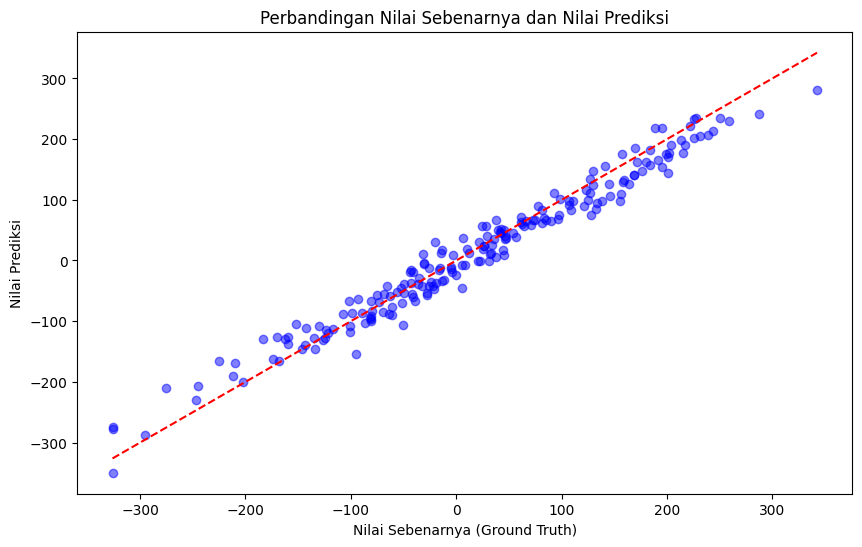

In [ ]:
import matplotlib.pyplot as plt

# Membuat scatter plot untuk perbandingan antara nilai sebenarnya dan nilai prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_xgb_pred_grid, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Garis referensi y=x
plt.xlabel('Nilai Sebenarnya (Ground Truth)')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Nilai Sebenarnya dan Nilai Prediksi')
plt.show()

3Interpretasi: Grafik ini berguna untuk mengevaluasi seberapa baik model memprediksi nilai yang sebenarnya. Jika titik-titik berada sangat dekat dengan garis merah, itu menandakan bahwa model memprediksi dengan akurat. Jika titik-titik tersebar jauh dari garis merah, itu menunjukkan bahwa model kurang akurat dalam memprediksi.

# **2. Discuss Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np


# Prediksi pada data pelatihan
y_pred_train = grid_search_xgb.predict(X_train)

# Hitung RMSE pada dataset pelatihan
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE pada dataset pelatihan: {rmse_train}")

# Prediksi pada data uji
y_pred_test = grid_search_xgb.predict(X_test)

# Hitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE pada dataset uji: {rmse}")


from sklearn.metrics import mean_absolute_error

# Prediksi pada data pelatihan dan uji
y_pred_train = grid_search_xgb.predict(X_train)

# Hitung MAE pada data pelatihan dan uji
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"MAE pada dataset pelatihan: {mae_train}")
print(f"MAE pada dataset uji: {mae_test}")


# Definisikan fungsi untuk menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Misalkan y_test adalah nilai sebenarnya dan y_pred_test adalah nilai prediksi model
# Contoh prediksi model
y_pred_test = grid_search_xgb.predict(X_test)

# Prediksi pada dataset pelatihan
y_pred_train = grid_search_xgb.predict(X_train)

# Menghitung MAPE pada dataset pelatihan
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
print(f"Mean Absolute Percentage Error (MAPE) pada dataset pelatihan: {mape_train}%")

# Menghitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Mean Absolute Percentage Error (MAPE) pada dataset uji: {mape}%")



RMSE pada dataset pelatihan: 8.957257004307746
RMSE pada dataset uji: 25.00907384585698
MAE pada dataset pelatihan: 6.94261643314077
MAE pada dataset uji: 20.30564023030516
Mean Absolute Percentage Error (MAPE) pada dataset pelatihan: 27.791858241369894%
Mean Absolute Percentage Error (MAPE) pada dataset uji: 74.0909036674338%


In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Definisikan fungsi untuk menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluasi pada dataset uji
y_pred_test = grid_search_xgb.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print(f"RMSE pada dataset uji: {rmse_test}")
print(f"MAE pada dataset uji: {mae_test}")
print(f"MAPE pada dataset uji: {mape_test}%")

# Bandingkan dengan dataset pelatihan
y_pred_train = grid_search_xgb.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

print(f"RMSE pada dataset pelatihan: {rmse_train}")
print(f"MAE pada dataset pelatihan: {mae_train}")
print(f"MAPE pada dataset pelatihan: {mape_train}%")

# Analisis Overfitting/Underfitting
if rmse_train < rmse_test and mae_train < mae_test:
    print("Model kemungkinan mengalami overfitting")
elif rmse_train > rmse_test and mae_train > mae_test:
    print("Model kemungkinan mengalami underfitting")
else:
    print("Model dapat menggeneralisasi dengan baik")


RMSE pada dataset uji: 25.00907384585698
MAE pada dataset uji: 20.30564023030516
MAPE pada dataset uji: 74.0909036674338%
RMSE pada dataset pelatihan: 8.957257004307746
MAE pada dataset pelatihan: 6.94261643314077
MAPE pada dataset pelatihan: 27.791858241369894%
Model kemungkinan mengalami overfitting


# **3. Error Analysis **

Setelah diskusi kita merubah fitur yang digunakan menjadi :
1.	bedrooms
2.	bathrooms
3.	beds
4.	minimum_nights
5.	maximum_nights
6.	availability_365
7.	review_scores_rating
8.	reviews_per_month
9.	room_type
10.	host_is_superhost
11.	neighbourhood
12.	latitude
13.	longitude
14.	property_type
15.	price


Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Memilih fitur yang relevan untuk model
X = listings_df[['bedrooms', 'bathrooms', 'beds', 'minimum_nights', 'maximum_nights', 'availability_365',
                 'review_scores_rating', 'reviews_per_month', 'room_type', 'host_is_superhost', 'neighbourhood',
                 'latitude', 'longitude', 'property_type']]
y = listings_df['price']

# Mengisi missing values pada fitur numerik dengan median
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].median())

# Mengisi missing values pada fitur kategorikal dengan mode (nilai yang paling sering muncul)
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = X[col].fillna(X[col].mode()[0])

# Mengonversi fitur kategorikal menggunakan Label Encoding
label_encoder = LabelEncoder()

# Kolom yang bersifat kategorikal
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
import numpy as np


# Membangun model regresi linier
linear_model = LinearRegression()

# Melatih model dengan data latih
linear_model.fit(X_train, y_train)

# Memprediksi harga sewa dengan data uji
y_pred = linear_model.predict(X_test)

# Menilai performa model menggunakan Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) untuk regresi linier: {mae}")

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) untuk regresi linier: {rmse}")

# Menghitung Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE) untuk regresi linier: {mape}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan cross_val_score untuk melakukan cross-validation dengan scoring yang sesuai
cv_mae = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# K-Fold Cross Validation untuk MAPE
cv_mape = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Menampilkan hasil cross-validation
print(f"K-Fold Cross-Validation MAE: {-cv_mae.mean()}")  # Karena scoring menggunakan nilai negatif
print(f"K-Fold Cross-Validation RMSE: {-cv_rmse.mean()}")  # Karena scoring menggunakan nilai negatif
print(f"K-Fold Cross-Validation MAPE: {-cv_mape.mean()}")  # Karena scoring menggunakan nilai negatif


Mean Absolute Error (MAE) untuk regresi linier: 37.71318839993596
Root Mean Squared Error (RMSE) untuk regresi linier: 59.832246561096866
Mean Absolute Percentage Error (MAPE) untuk regresi linier: 33.6494953498286
K-Fold Cross-Validation MAE: 38.47129291787567
K-Fold Cross-Validation RMSE: 63.38719197872223
K-Fold Cross-Validation MAPE: 0.32987737988299953


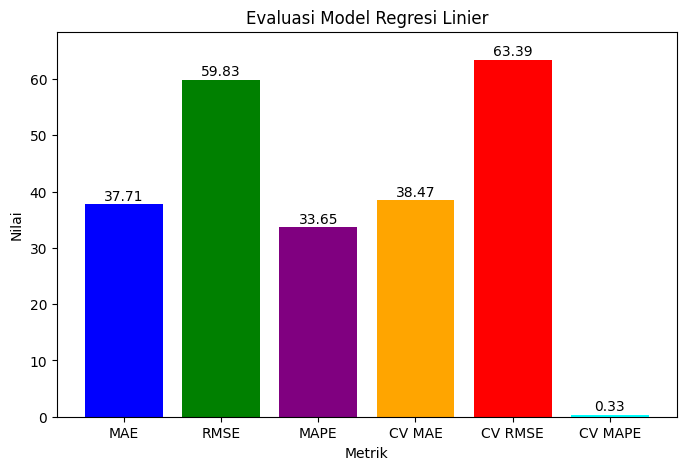

In [ ]:

metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [mae, rmse, mape, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Membuat bar plot untuk visualisasi
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'cyan'])

# Menambahkan judul dan label
plt.title('Evaluasi Model Regresi Linier')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.ylim(0, max(values) + 5)  # Mengatur batas atas agar ada ruang untuk menampilkan nilai di atas bar

# Menambahkan nilai di atas setiap bar
for i in range(len(values)):
    plt.text(i, values[i] + 0.2, round(values[i], 2), ha='center', va='bottom')

# Menampilkan plot
plt.show()

GridSearchCV untuk Linear Regression

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.pipeline import make_pipeline

# Menentukan parameter grid untuk pencarian
param_grid = {
    'linearregression__fit_intercept': [True, False],  # Targeting the LinearRegression step in the pipeline
}

# Membuat pipeline untuk scaling dan regresi linier
linear_model = make_pipeline(StandardScaler(), LinearRegression())

# Menerapkan GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Melatih model dengan pencarian grid
grid_search.fit(X_train, y_train)

# Menampilkan hasil pencarian terbaik
print("Best hyperparameters using GridSearchCV: ", grid_search.best_params_)

# Memprediksi harga sewa dengan data uji menggunakan model terbaik
y_pred_grid = grid_search.predict(X_test)

# Menghitung MAE dan RMSE untuk model terbaik
mae_grid = mean_absolute_error(y_test, y_pred_grid)
rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))

print(f"Mean Absolute Error (MAE) untuk regresi linier setelah GridSearchCV: {mae_grid}")
print(f"Root Mean Squared Error (RMSE) untuk regresi linier setelah GridSearchCV: {rmse_grid}")

# Menambahkan perhitungan MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_grid = mean_absolute_percentage_error(y_test, y_pred_grid)
print(f"Mean Absolute Percentage Error (MAPE) untuk regresi linier setelah GridSearchCV: {mape_grid}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi model menggunakan cross_val_score untuk MAE dan RMSE
cv_mae = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf,
                           scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Menampilkan hasil cross-validation
print(f"K-Fold Cross-Validation MAE: {-cv_mae.mean()}")  # Karena scoring menggunakan nilai negatif
print(f"K-Fold Cross-Validation RMSE: {-cv_rmse.mean()}")  # Karena scoring menggunakan nilai negatif
print(f"K-Fold Cross-Validation MAPE: {-cv_mape.mean()}")  # Karena scoring menggunakan nilai negatif


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters using GridSearchCV:  {'linearregression__fit_intercept': True}
Mean Absolute Error (MAE) untuk regresi linier setelah GridSearchCV: 37.71318839993526
Root Mean Squared Error (RMSE) untuk regresi linier setelah GridSearchCV: 59.83224656109669
Mean Absolute Percentage Error (MAPE) untuk regresi linier setelah GridSearchCV: 33.649495349827276
K-Fold Cross-Validation MAE: 38.47129291787586
K-Fold Cross-Validation RMSE: 63.38719197872298
K-Fold Cross-Validation MAPE: 32.9877379883


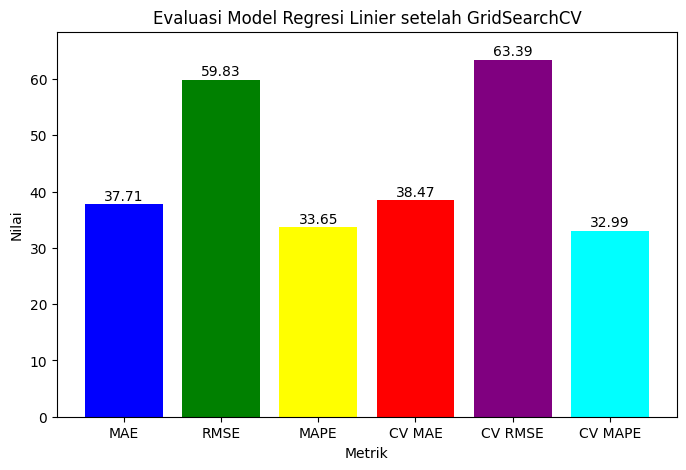

In [ ]:
# Adding MAPE to the metrics and values
metrics_grid = ['MAE', 'RMSE','MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values_grid = [mae_grid, rmse_grid, mape_grid, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Creating the bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics_grid, values_grid, color=['blue', 'green', 'yellow', 'red', 'purple', 'cyan'])
plt.title('Evaluasi Model Regresi Linier setelah GridSearchCV')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.ylim(0, max(values_grid) + 5)

# Adding values on top of each bar
for i in range(len(values_grid)):
    plt.text(i, values_grid[i] + 0.2, round(values_grid[i], 2), ha='center', va='bottom')

# Display the plot
plt.show()



RandomizedSearchCV untuk Linear Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold


# Menentukan distribusi parameter untuk pencarian acak
param_dist = {
    'linearregression__fit_intercept': [True, False],  # Targeting the LinearRegression step in the pipeline
}

# Membuat pipeline dengan StandardScaler yang sudah disesuaikan
linear_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

# Menerapkan RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=linear_model, param_distributions=param_dist,
                                   n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Melatih model dengan pencarian acak
random_search.fit(X_train, y_train)

# Menampilkan hasil pencarian terbaik
print("Best hyperparameters using RandomizedSearchCV: ", random_search.best_params_)

# Memprediksi harga sewa dengan data uji menggunakan model terbaik
y_pred_random = random_search.predict(X_test)

# Menghitung MAE dan RMSE untuk model terbaik
mae_random = mean_absolute_error(y_test, y_pred_random)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))

print(f"Mean Absolute Error (MAE) untuk regresi linier setelah RandomizedSearchCV: {mae_random}")
print(f"Root Mean Squared Error (RMSE) untuk regresi linier setelah RandomizedSearchCV: {rmse_random}")

# Menambahkan perhitungan MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_random = mean_absolute_percentage_error(y_test, y_pred_random)
print(f"Mean Absolute Percentage Error (MAPE) untuk regresi linier setelah RandomizedSearchCV: {mape_random}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi model menggunakan cross_val_score untuk MAE dan RMSE
cv_mae_random = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse_random = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape_random = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf,
                                  scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Menampilkan hasil cross-validation
print(f"K-Fold Cross-Validation MAE: {-cv_mae_random.mean()}")  # Karena scoring menggunakan nilai negatif
print(f"K-Fold Cross-Validation RMSE: {-cv_rmse_random.mean()}")  # Karena scoring menggunakan nilai negatif
print(f"K-Fold Cross-Validation MAPE: {-cv_mape_random.mean()}")  # Karena scoring menggunakan nilai negatif


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters using RandomizedSearchCV:  {'linearregression__fit_intercept': True}
Mean Absolute Error (MAE) untuk regresi linier setelah RandomizedSearchCV: 37.71318839993579
Root Mean Squared Error (RMSE) untuk regresi linier setelah RandomizedSearchCV: 59.8322465610968
Mean Absolute Percentage Error (MAPE) untuk regresi linier setelah RandomizedSearchCV: 33.64949534982835
K-Fold Cross-Validation MAE: 38.47129291787583
K-Fold Cross-Validation RMSE: 63.38719197872301
K-Fold Cross-Validation MAPE: 32.98773798829999


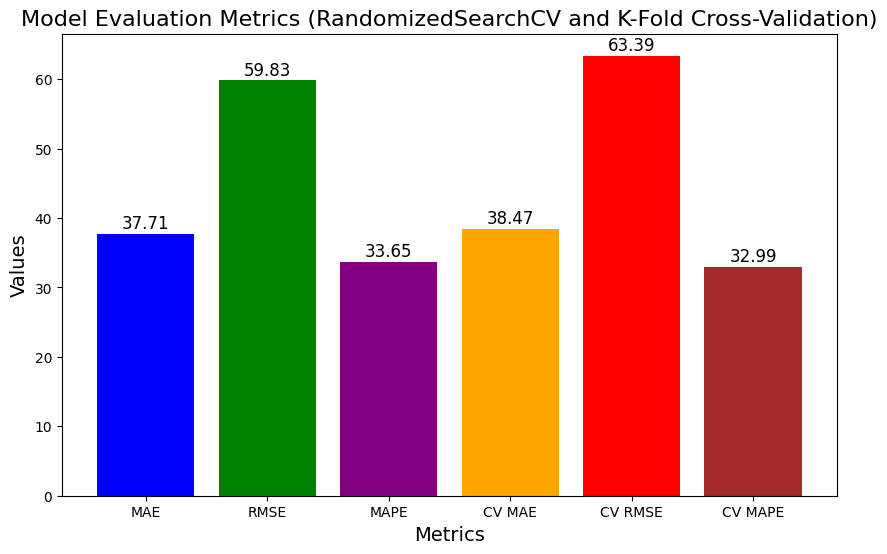

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [mae_random, rmse_random, mape_random, -cv_mae_random.mean(), -cv_rmse_random.mean(), -cv_mape_random.mean()]

# Create a bar plot for evaluation metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Adding titles and labels
plt.title("Model Evaluation Metrics (RandomizedSearchCV and K-Fold Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Display values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()

Random Forest

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Memilih fitur yang relevan untuk model
X = listings_df[['bedrooms', 'bathrooms', 'beds', 'minimum_nights', 'maximum_nights', 'availability_365',
                 'review_scores_rating', 'reviews_per_month', 'room_type', 'host_is_superhost', 'neighbourhood',
                 'latitude', 'longitude', 'property_type']]
y = listings_df['price']

# Mengisi missing values pada fitur numerik dengan median
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].median())

# Mengisi missing values pada fitur kategorikal dengan mode (nilai yang paling sering muncul)
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = X[col].fillna(X[col].mode()[0])

# Mengonversi fitur kategorikal menggunakan Label Encoding
label_encoder = LabelEncoder()

# Kolom yang bersifat kategorikal
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Building the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with the training data
rf_model.fit(X_train, y_train)

# Predict rental prices with test data
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model performance using Mean Absolute Error
rf_mae = mean_absolute_error(y_test, y_rf_pred)
print(f"Mean Absolute Error (MAE) for Random Forest: {rf_mae}")

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))
print(f"Root Mean Squared Error (RMSE) for Random Forest: {rmse}")

# Adding the MAPE calculation
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_rf = mean_absolute_percentage_error(y_test, y_rf_pred)
print(f"Mean Absolute Percentage Error (MAPE) for Random Forest: {mape_rf}")

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Using cross_val_score to compute MAE and RMSE with cross-validation
cv_mae = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluate MAPE with k-fold cross-validation
cv_mape = cross_val_score(rf_model, X_train, y_train, cv=kf,
                           scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Display the k-fold cross-validation results
print(f"K-Fold Cross-Validation MAE : {-cv_mae.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation RMSE: {-cv_rmse.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation MAPE: {-cv_mape.mean()}")  # Negate the value because scoring returns negative values


Mean Absolute Error (MAE) for Random Forest: 34.35133507853403
Root Mean Squared Error (RMSE) for Random Forest: 55.99413128139515
Mean Absolute Percentage Error (MAPE) for Random Forest: 28.211648007488705
K-Fold Cross-Validation MAE : 33.92835113090607
K-Fold Cross-Validation RMSE: 59.578930934275625
K-Fold Cross-Validation MAPE: 27.80153574961824


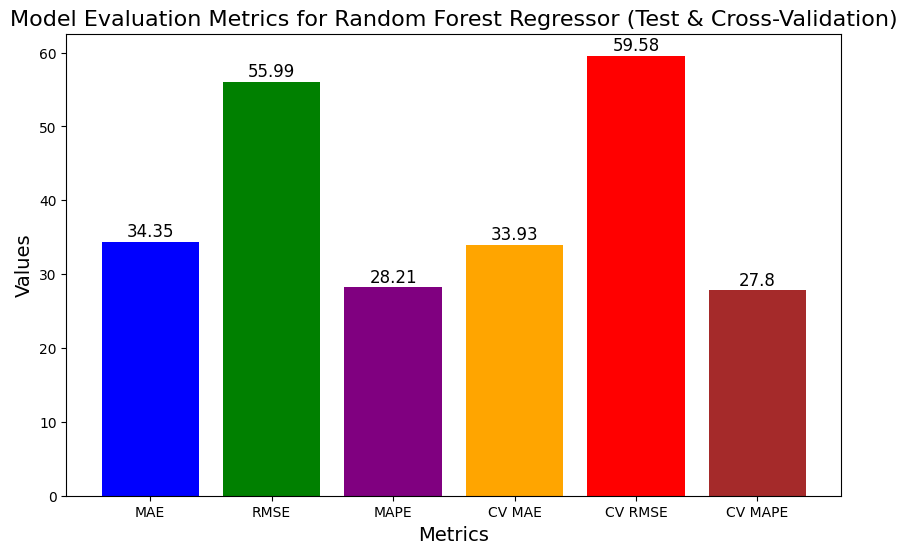

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [rf_mae, rmse, mape_rf, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Create a bar plot for evaluation metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Adding titles and labels
plt.title("Model Evaluation Metrics for Random Forest Regressor (Test & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Display values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


GridSearchCV RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Menentukan parameter grid untuk pencarian
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon dalam hutan
    'max_depth': [5, 10, 15],         # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Jumlah minimal sampel untuk membagi simpul
    'min_samples_leaf': [1, 2, 4]     # Jumlah minimal sampel di daun
}

# Membangun model RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Menerapkan GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Melatih model dengan pencarian grid
grid_search.fit(X_train, y_train)

# Menampilkan hasil pencarian terbaik
print("Best hyperparameters using GridSearchCV: ", grid_search.best_params_)

# Memprediksi harga sewa dengan data uji menggunakan model terbaik
y_pred_grid = grid_search.predict(X_test)

# Menghitung MAE dan RMSE untuk model terbaik
mae_grid = mean_absolute_error(y_test, y_pred_grid)
rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))

print(f"Mean Absolute Error (MAE) untuk Random Forest setelah GridSearchCV: {mae_grid}")
print(f"Root Mean Squared Error (RMSE) untuk Random Forest setelah GridSearchCV: {rmse_grid}")

# Menambahkan perhitungan MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_grid = mean_absolute_percentage_error(y_test, y_pred_grid)
print(f"Mean Absolute Percentage Error (MAPE) untuk Random Forest setelah GridSearchCV: {mape_grid}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan cross_val_score untuk menghitung MAE dan RMSE dengan cross-validation
cv_mae = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf,
                           scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Menampilkan hasil k-fold cross-validation
print(f"K-Fold Cross-Validation MAE for Random Forest(GridSearchCV): {-cv_mae.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation RMSE Random Forest(GridSearchCV): {-cv_rmse.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation MAPE Random Forest(GridSearchCV): {-cv_mape.mean()}")  # Negate the value because scoring returns negative values


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters using GridSearchCV:  {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error (MAE) untuk Random Forest setelah GridSearchCV: 33.67638104936105
Root Mean Squared Error (RMSE) untuk Random Forest setelah GridSearchCV: 54.470963423590234
Mean Absolute Percentage Error (MAPE) untuk Random Forest setelah GridSearchCV: 27.59932047918739
K-Fold Cross-Validation MAE for Random Forest(GridSearchCV): 33.10757445804161
K-Fold Cross-Validation RMSE Random Forest(GridSearchCV): 57.84243525628126
K-Fold Cross-Validation MAPE Random Forest(GridSearchCV): 27.013264519771546


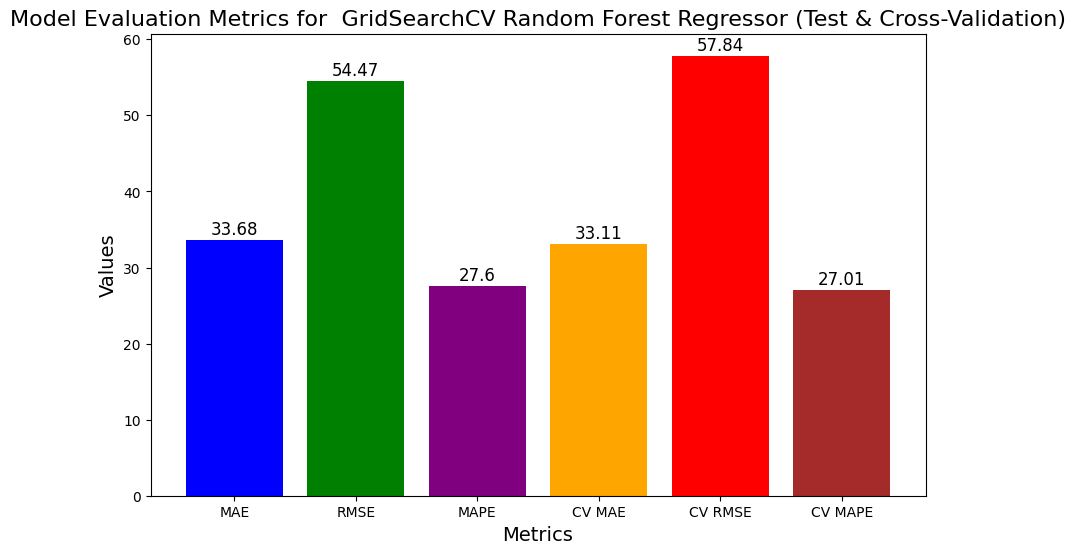

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [mae_grid, rmse_grid, mape_grid, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Create a bar plot for evaluation metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Adding titles and labels
plt.title("Model Evaluation Metrics for  GridSearchCV Random Forest Regressor (Test & Cross-Validation)", fontsize=16)

plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Display values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


RandomizedSearchCV Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from scipy.stats import randint


# Menentukan distribusi parameter untuk pencarian acak
param_dist = {
    'n_estimators': randint(50, 200),  # Jumlah pohon secara acak antara 50 hingga 200
    'max_depth': randint(5, 20),        # Kedalaman maksimum pohon secara acak antara 5 hingga 20
    'min_samples_split': randint(2, 20),  # Jumlah minimal sampel untuk membagi simpul
    'min_samples_leaf': randint(1, 10)    # Jumlah minimal sampel di daun
}

# Membangun model RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Menerapkan RandomizedSearchCV untuk mencari hyperparameter terbaik
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Melatih model dengan pencarian acak
random_search.fit(X_train, y_train)

# Menampilkan hasil pencarian terbaik
print("Best hyperparameters using RandomizedSearchCV: ", random_search.best_params_)

# Memprediksi harga sewa dengan data uji menggunakan model terbaik
y_pred_random = random_search.predict(X_test)

# Menghitung MAE dan RMSE untuk model terbaik
mae_random = mean_absolute_error(y_test, y_pred_random)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))

print(f"Mean Absolute Error (MAE) untuk Random Forest setelah RandomizedSearchCV: {mae_random}")
print(f"Root Mean Squared Error (RMSE) untuk Random Forest setelah RandomizedSearchCV: {rmse_random}")

# Menambahkan perhitungan MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_random = mean_absolute_percentage_error(y_test, y_pred_random)
print(f"Mean Absolute Percentage Error (MAPE) untuk Random Forest setelah RandomizedSearchCV: {mape_random}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan cross_val_score untuk menghitung MAE dan RMSE dengan cross-validation
cv_mae = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf,
                           scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Menampilkan hasil k-fold cross-validation
print(f"K-Fold Cross-Validation MAE for Random Forest(RandomizedSearchCV): {-cv_mae.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation RMSE for Random Forest(RandomizedSearchCV): {-cv_rmse.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation MAPE for Random Forest(RandomizedSearchCV): {-cv_mape.mean()}")  # Negate the value because scoring returns negative values


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters using RandomizedSearchCV:  {'max_depth': 14, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 69}
Mean Absolute Error (MAE) untuk Random Forest setelah RandomizedSearchCV: 33.445738441357584
Root Mean Squared Error (RMSE) untuk Random Forest setelah RandomizedSearchCV: 54.755015472291575
Mean Absolute Percentage Error (MAPE) untuk Random Forest setelah RandomizedSearchCV: 27.485757925088595
K-Fold Cross-Validation MAE for Random Forest(RandomizedSearchCV): 33.25129424187045
K-Fold Cross-Validation RMSE for Random Forest(RandomizedSearchCV): 57.99858406694265
K-Fold Cross-Validation MAPE for Random Forest(RandomizedSearchCV): 27.152343195302016


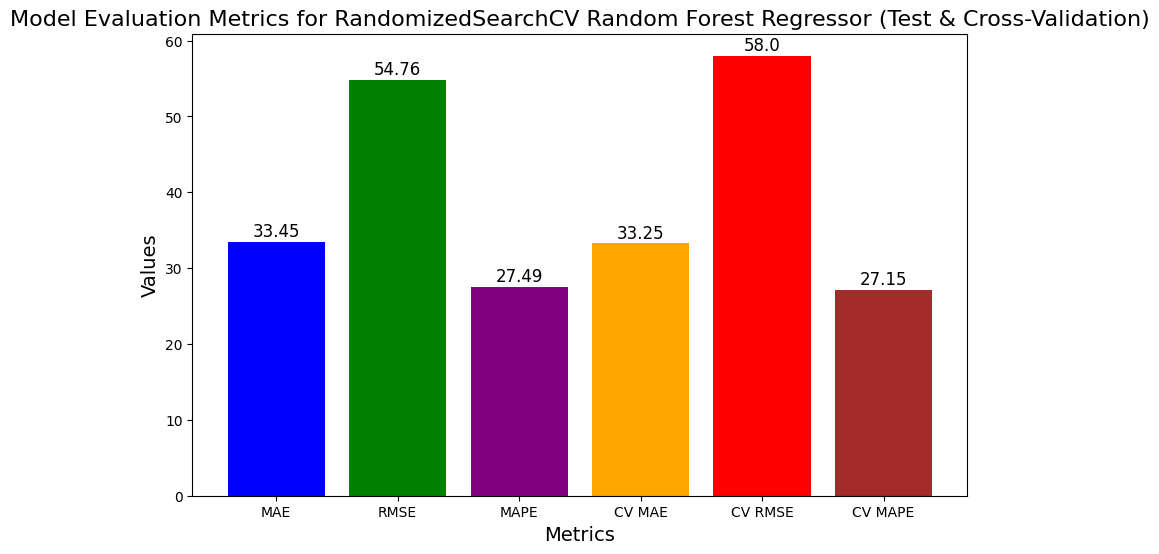

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [mae_random, rmse_random, mape_random, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Create a bar plot for evaluation metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Adding titles and labels
plt.title("Model Evaluation Metrics for RandomizedSearchCV Random Forest Regressor (Test & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Display values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()

Gradient Boosting

In [ ]:
# Mengimpor library tambahan
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



# Memilih fitur yang relevan untuk model
X = listings_df[['bedrooms', 'bathrooms', 'beds', 'minimum_nights', 'maximum_nights', 'availability_365',
                 'review_scores_rating', 'reviews_per_month', 'room_type', 'host_is_superhost', 'neighbourhood',
                 'latitude', 'longitude', 'property_type']]
y = listings_df['price']

# Mengisi missing values pada fitur numerik dengan median
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = X[numerical_columns].fillna(X[numerical_columns].median())

# Mengisi missing values pada fitur kategorikal dengan mode (nilai yang paling sering muncul)
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = X[col].fillna(X[col].mode()[0])

# Mengonversi fitur kategorikal menggunakan Label Encoding
label_encoder = LabelEncoder()

# Kolom yang bersifat kategorikal
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Importing necessary libraries
from sklearn.ensemble import GradientBoostingRegressor

# Membangun model Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Melatih model dengan data latih
gb_model.fit(X_train, y_train)

# Memprediksi harga sewa dengan data uji
y_gb_pred = gb_model.predict(X_test)

# Menilai performa model menggunakan Mean Absolute Error
gb_mae = mean_absolute_error(y_test, y_gb_pred)

# Menghitung Root Mean Squared Error (RMSE)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_gb_pred))

print(f"Mean Absolute Error (MAE) untuk GradientBoosting: {gb_mae}")
print(f"Root Mean Squared Error (RMSE) untuk GradientBoosting: {gb_rmse}")

# Menambahkan perhitungan MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

gb_mape = mean_absolute_percentage_error(y_test, y_gb_pred)
print(f"Mean Absolute Percentage Error (MAPE) untuk GradientBoosting: {gb_mape}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan cross_val_score untuk menghitung MAE dan RMSE dengan cross-validation
cv_mae = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape = cross_val_score(gb_model, X_train, y_train, cv=kf,
                          scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Menampilkan hasil k-fold cross-validation
print(f"K-Fold Cross-Validation MAE for Gradient Boosting: {-cv_mae.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation RMSE for Gradient Boosting: {-cv_rmse.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation MAPE for Gradient Boosting: {-cv_mape.mean()}")  # Negate the value because scoring returns negative values




Mean Absolute Error (MAE) untuk GradientBoosting: 34.035147618961986
Root Mean Squared Error (RMSE) untuk GradientBoosting: 56.56280016452461
Mean Absolute Percentage Error (MAPE) untuk GradientBoosting: 28.352818809615627
K-Fold Cross-Validation MAE for Gradient Boosting: 34.42290728823777
K-Fold Cross-Validation RMSE for Gradient Boosting: 58.95450339508612
K-Fold Cross-Validation MAPE for Gradient Boosting: 28.350032987064576


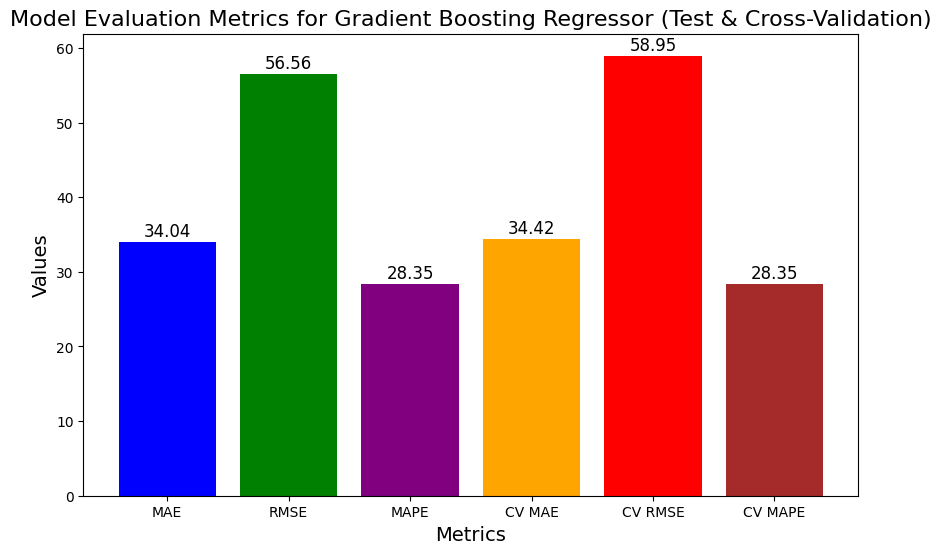

In [ ]:
# Data untuk visualisasi
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [gb_mae, gb_rmse, gb_mape, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Menambahkan judul dan label
plt.title("Model Evaluation Metrics for Gradient Boosting Regressor (Test & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Menampilkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Menampilkan plot
plt.show()

GridSearchCV untuk Gradient Boosting

In [ ]:
# Importing necessary library
from sklearn.model_selection import GridSearchCV

# Menerapkan GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Menampilkan hasil hyperparameter terbaik
best_params = grid_search.best_params_
print("Best hyperparameters using GridSearchCV: ", best_params)

# Memprediksi dengan model terbaik
y_gb_pred_grid = grid_search.predict(X_test)

# Menghitung MAE dan RMSE
gb_mae_grid = mean_absolute_error(y_test, y_gb_pred_grid)
rmse_grid = np.sqrt(mean_squared_error(y_test, y_gb_pred_grid))

print(f"Mean Absolute Error (MAE) untuk Gradient Boosting setelah GridSearchCV: {gb_mae_grid}")
print(f"Root Mean Squared Error (RMSE) untuk Gradient Boosting setelah GridSearchCV: {rmse_grid}")

# Menghitung MAPE
gb_mape_grid = mean_absolute_percentage_error(y_test, y_gb_pred_grid)
print(f"Mean Absolute Percentage Error (MAPE) untuk Gradient Boosting setelah GridSearchCV: {gb_mape_grid}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan cross_val_score untuk menghitung MAE, RMSE, dan MAPE dengan cross-validation
cv_mae = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf,
                          scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Menampilkan hasil k-fold cross-validation
print(f"K-Fold Cross-Validation MAE for Gradient Boosting(GridSearchCV): {-cv_mae.mean()}")
print(f"K-Fold Cross-Validation RMSE for Gradient Boosting(GridSearchCV): {-cv_rmse.mean()}")
print(f"K-Fold Cross-Validation MAPE for Gradient Boosting(GridSearchCV): {-cv_mape.mean()}")




Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters using GridSearchCV:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Mean Absolute Error (MAE) untuk Gradient Boosting setelah GridSearchCV: 33.46088826077383
Root Mean Squared Error (RMSE) untuk Gradient Boosting setelah GridSearchCV: 55.048912163143925
Mean Absolute Percentage Error (MAPE) untuk Gradient Boosting setelah GridSearchCV: 27.620443500383967
K-Fold Cross-Validation MAE for Gradient Boosting(GridSearchCV): 34.08930755001347
K-Fold Cross-Validation RMSE for Gradient Boosting(GridSearchCV): 59.17834439955683
K-Fold Cross-Validation MAPE for Gradient Boosting(GridSearchCV): 28.126753108021354


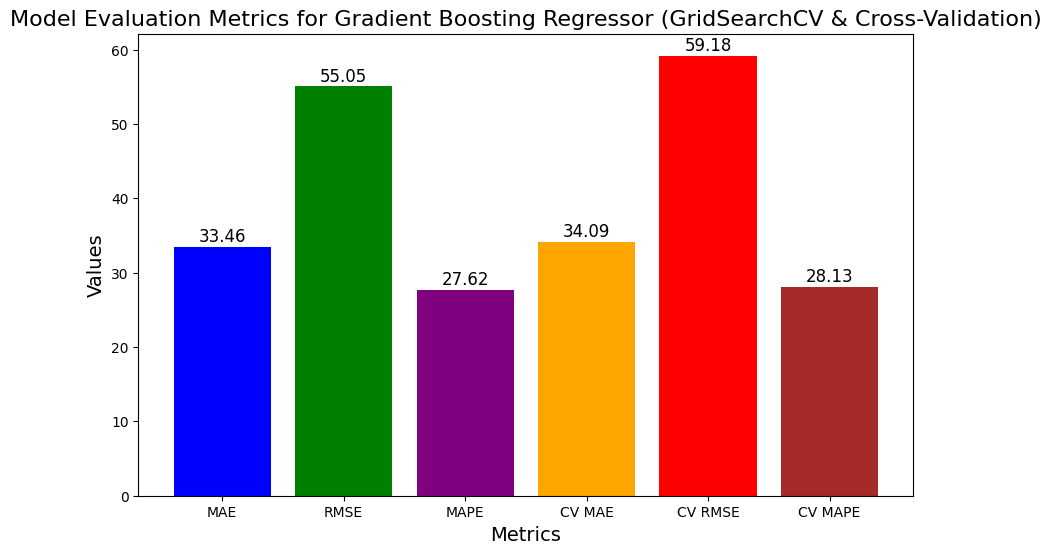

In [ ]:
# Data untuk visualisasi
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [gb_mae_grid, rmse_grid, gb_mape_grid, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Menambahkan judul dan label
plt.title("Model Evaluation Metrics for Gradient Boosting Regressor (GridSearchCV & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Menampilkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Menampilkan plot
plt.show()

RandomizedSearchCV untuk Gradient Boosting

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from scipy.stats import uniform

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages
    'learning_rate': uniform(0.01, 0.2),  # Uniform distribution for learning rate
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the individual trees
    'subsample': uniform(0.7, 0.3)  # Randomized subsample size between 0.7 and 1.0
}

# Create GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Apply RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Train the model with randomized search
random_search.fit(X_train, y_train)

# Display the best hyperparameters from RandomizedSearchCV
print("Best hyperparameters using RandomizedSearchCV: ", random_search.best_params_)

# Predict with the best model
y_gb_pred_random = random_search.predict(X_test)

# Calculate MAE and RMSE for the best model
gb_mae_random = mean_absolute_error(y_test, y_gb_pred_random)
rmse_random = np.sqrt(mean_squared_error(y_test, y_gb_pred_random))

print(f"Mean Absolute Error (MAE) for Gradient Boosting after RandomizedSearchCV: {gb_mae_random}")
print(f"Root Mean Squared Error (RMSE) for Gradient Boosting after RandomizedSearchCV: {rmse_random}")

# Define function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Compute MAPE for the best model
gb_mape_random = mean_absolute_percentage_error(y_test, y_gb_pred_random)
print(f"Mean Absolute Percentage Error (MAPE) untuk Gradient Boosting setelah RandomizedSearchCV: {gb_mape_random}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Using cross_val_score to calculate MAE and RMSE with cross-validation
cv_mae = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Displaying the results of k-fold cross-validation
print(f"K-Fold Cross-Validation MAE for Gradient Boosting(RandomizedSearchCV): {-cv_mae.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation RMSE for Gradient Boosting(RandomizedSearchCV): {-cv_rmse.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation MAPE for Gradient Boosting(RandomizedSearchCV): {-cv_mape.mean()}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters using RandomizedSearchCV:  {'learning_rate': np.float64(0.046680901970686764), 'max_depth': 6, 'n_estimators': 100, 'subsample': np.float64(0.8574269294896713)}
Mean Absolute Error (MAE) for Gradient Boosting after RandomizedSearchCV: 33.9663784779764
Root Mean Squared Error (RMSE) for Gradient Boosting after RandomizedSearchCV: 57.268041111168905
Mean Absolute Percentage Error (MAPE) untuk Gradient Boosting setelah RandomizedSearchCV: 28.14547376941666
K-Fold Cross-Validation MAE for Gradient Boosting(RandomizedSearchCV): 34.00645439721332
K-Fold Cross-Validation RMSE for Gradient Boosting(RandomizedSearchCV): 59.50479223510767
K-Fold Cross-Validation MAPE for Gradient Boosting(RandomizedSearchCV): 28.126753108021354


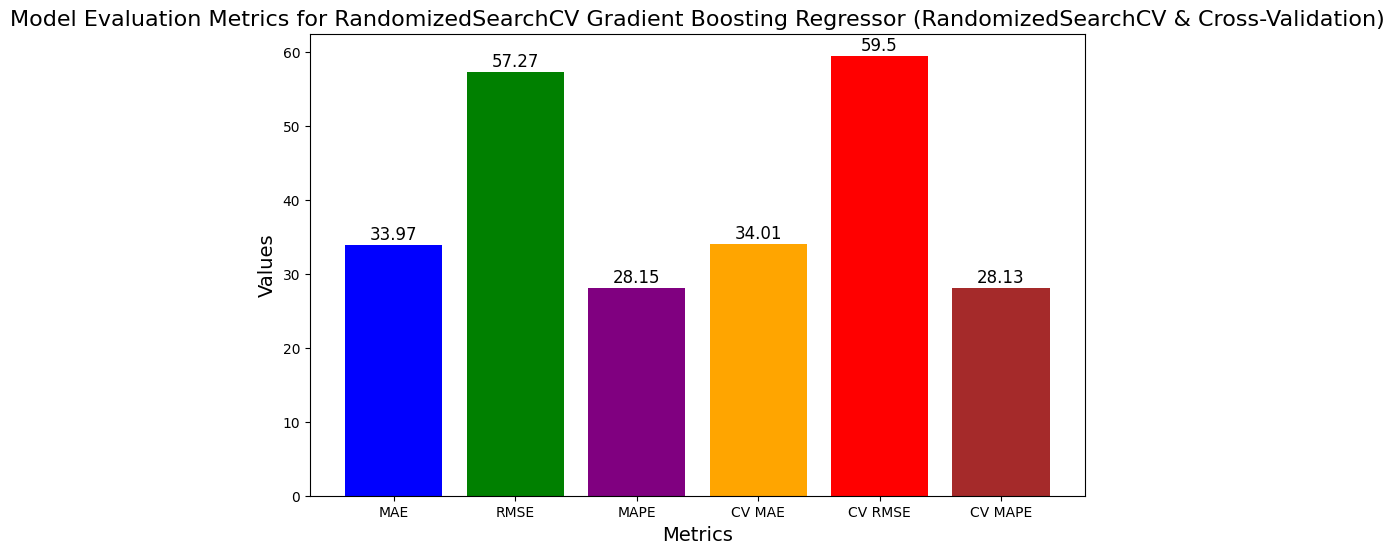

In [ ]:
# Data untuk visualisasi
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [gb_mae_random, rmse_random, gb_mape_random, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Menambahkan judul dan label
plt.title("Model Evaluation Metrics for RandomizedSearchCV Gradient Boosting Regressor (RandomizedSearchCV & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Menampilkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Menampilkan plot
plt.show()

XGBoost

In [ ]:
# Generate dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=14, noise=0.1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost Regressor model with default parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict with the trained model
y_xgb_pred = xgb_model.predict(X_test)

# Calculate MAE and RMSE for the model
xgb_mae = mean_absolute_error(y_test, y_xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_xgb_pred))

print(f"Mean Absolute Error (MAE) for XGBoost: {xgb_mae}")
print(f"Root Mean Squared Error (RMSE) for XGBoost: {xgb_rmse}")

# Define function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Compute MAPE for the model
xgb_mape = mean_absolute_percentage_error(y_test, y_xgb_pred)
print(f"Mean Absolute Percentage Error (MAPE) for XGBoost: {xgb_mape}")

# K-Fold Cross Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Using cross_val_score to calculate MAE, RMSE with cross-validation
cv_mae_xgb = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse_xgb = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape_xgb = cross_val_score(xgb_model, X_train, y_train, cv=kf,
                              scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Display cross-validation results
print(f"K-Fold Cross-Validation MAE for XGBoost: {-cv_mae_xgb.mean()}")
print(f"K-Fold Cross-Validation RMSE for XGBoost: {-cv_rmse_xgb.mean()}")
print(f"K-Fold Cross-Validation MAPE for XGBoost: {-cv_mape_xgb.mean()}")



Mean Absolute Error (MAE) for XGBoost: 52.458159674465925
Root Mean Squared Error (RMSE) for XGBoost: 66.48258957841547
Mean Absolute Percentage Error (MAPE) for XGBoost: 156.9202330079311
K-Fold Cross-Validation MAE for XGBoost: 52.13569398526986
K-Fold Cross-Validation RMSE for XGBoost: 66.70120386335752
K-Fold Cross-Validation MAPE for XGBoost: 137.17006937404818


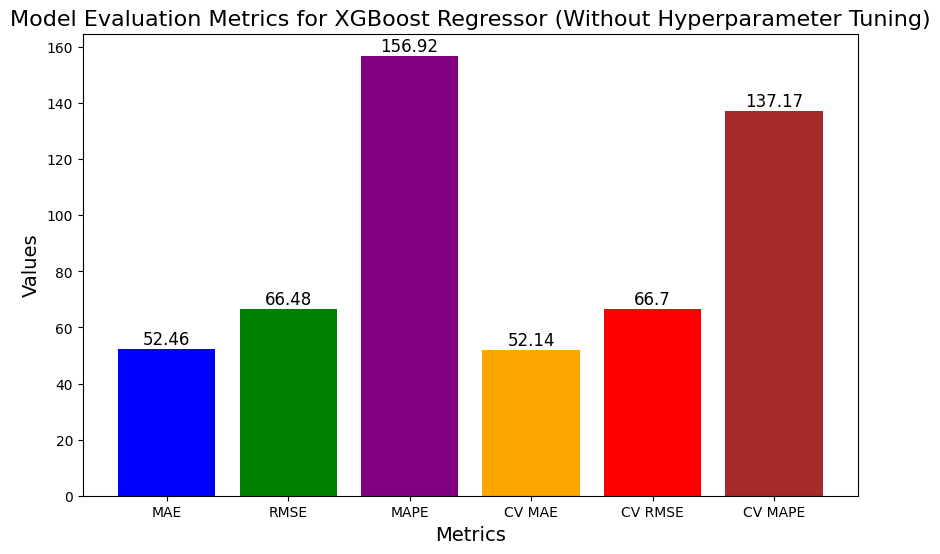

In [ ]:
# Data untuk visualisasi
metrics_xgb = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values_xgb = [xgb_mae, xgb_rmse, xgb_mape, -cv_mae_xgb.mean(), -cv_rmse_xgb.mean(), -cv_mape_xgb.mean()]

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
bars_xgb = plt.bar(metrics_xgb, values_xgb, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Menambahkan judul dan label
plt.title("Model Evaluation Metrics for XGBoost Regressor (Without Hyperparameter Tuning)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Menampilkan nilai di atas setiap bar
for bar in bars_xgb:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Menampilkan plot
plt.show()

GridSearchCV untuk XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5, 6],  # Depth of the trees
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used per boosting round
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]  # Fraction of features used per tree
}

# Create GridSearchCV with XGBoost Regressor
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb,
                               cv=3, n_jobs=-1, verbose=2)

# Train the model with GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Display the best hyperparameters from GridSearchCV
best_params_grid_xgb = grid_search_xgb.best_params_
print("Best hyperparameters using GridSearchCV (XGBoost): ", best_params_grid_xgb)

# Predict with the best model
y_xgb_pred_grid = grid_search_xgb.predict(X_test)

# Calculate MAE and RMSE for the best model
xgb_mae_grid = mean_absolute_error(y_test, y_xgb_pred_grid)
xgb_rmse_grid = np.sqrt(mean_squared_error(y_test, y_xgb_pred_grid))

print(f"Mean Absolute Error (MAE) for XGBoost after GridSearchCV: {xgb_mae_grid}")
print(f"Root Mean Squared Error (RMSE) for XGBoost after GridSearchCV: {xgb_rmse_grid}")

# Compute MAPE for the best model
xgb_mape_grid = mean_absolute_percentage_error(y_test, y_xgb_pred_grid)
print(f"Mean Absolute Percentage Error (MAPE) for XGBoost after GridSearchCV: {xgb_mape_grid}")

# K-Fold Cross Validation
cv_mae_grid_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse_grid_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape_grid_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_train, y_train, cv=kf,
                                   scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Display cross-validation results
print(f"K-Fold Cross-Validation MAE for XGBoost (GridSearchCV): {-cv_mae_grid_xgb.mean()}")
print(f"K-Fold Cross-Validation RMSE for XGBoost (GridSearchCV): {-cv_rmse_grid_xgb.mean()}")
print(f"K-Fold Cross-Validation MAPE for XGBoost (GridSearchCV): {-cv_mape_grid_xgb.mean()}")



Fitting 3 folds for each of 1024 candidates, totalling 3072 fits
Best hyperparameters using GridSearchCV (XGBoost):  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Mean Absolute Error (MAE) for XGBoost after GridSearchCV: 32.65097169840454
Root Mean Squared Error (RMSE) for XGBoost after GridSearchCV: 42.05800605309765
Mean Absolute Percentage Error (MAPE) for XGBoost after GridSearchCV: 93.6927642067836
K-Fold Cross-Validation MAE for XGBoost (GridSearchCV): 31.81140554694097
K-Fold Cross-Validation RMSE for XGBoost (GridSearchCV): 41.4813526361177
K-Fold Cross-Validation MAPE for XGBoost (GridSearchCV): 74.28161928514146


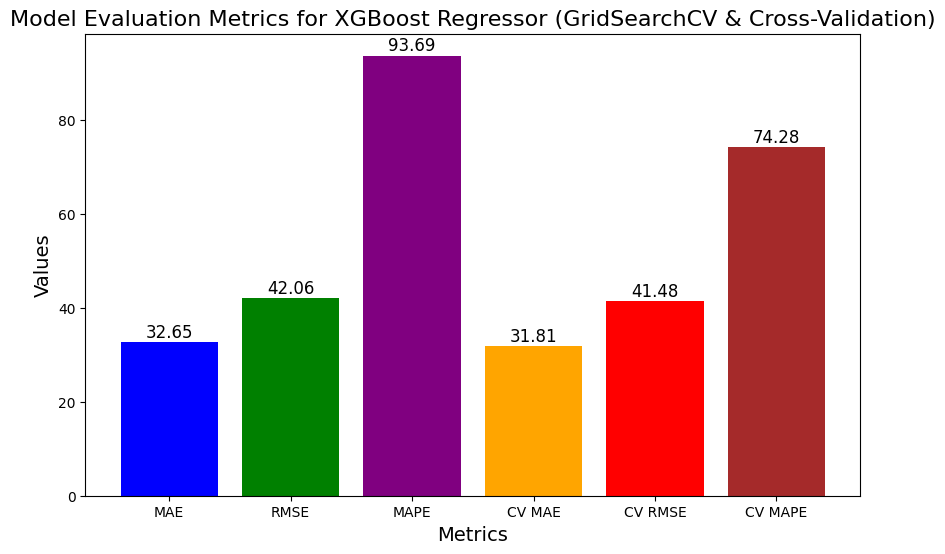

In [ ]:
# Data untuk visualisasi
metrics_xgb_grid = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values_xgb_grid = [xgb_mae_grid, xgb_rmse_grid, xgb_mape_grid, -cv_mae_grid_xgb.mean(), -cv_rmse_grid_xgb.mean(), -cv_mape_grid_xgb.mean()]

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
bars_xgb_grid = plt.bar(metrics_xgb_grid, values_xgb_grid, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Menambahkan judul dan label
plt.title("Model Evaluation Metrics for XGBoost Regressor (GridSearchCV & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Menampilkan nilai di atas setiap bar
for bar in bars_xgb_grid:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Menampilkan plot
plt.show()

RandomizedSearchCV untuk XGBoost

In [ ]:
# Re-import necessary libraries after execution state reset
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.datasets import make_regression

# Generate dataset since previous state was lost
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distribution for RandomizedSearchCV for XGBoost
param_dist_xgb = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.2),  # Learning rate
    'max_depth': [3, 4, 5, 6],  # Depth of the trees
    'subsample': uniform(0.7, 0.3),  # Fraction of samples used per boosting round
    'colsample_bytree': uniform(0.7, 0.3)  # Fraction of features used per tree
}

# Create XGBoost Regressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Apply RandomizedSearchCV to find the best hyperparameters for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb,
                                       n_iter=5, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Train the model with randomized search
random_search_xgb.fit(X_train, y_train)

# Display the best hyperparameters from RandomizedSearchCV
best_params_xgb = random_search_xgb.best_params_
print("Best hyperparameters using RandomizedSearchCV (XGBoost): ", best_params_xgb)

# Predict with the best model
y_xgb_pred_random = random_search_xgb.predict(X_test)

# Calculate MAE and RMSE for the best model
xgb_mae_random = mean_absolute_error(y_test, y_xgb_pred_random)
xgb_rmse_random = np.sqrt(mean_squared_error(y_test, y_xgb_pred_random))

print(f"Mean Absolute Error (MAE) for XGBoost after RandomizedSearchCV: {xgb_mae_random}")
print(f"Root Mean Squared Error (RMSE) for XGBoost after RandomizedSearchCV: {xgb_rmse_random}")

# Define function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Compute MAPE for the best model
xgb_mape_random = mean_absolute_percentage_error(y_test, y_xgb_pred_random)
print(f"Mean Absolute Percentage Error (MAPE) for XGBoost after RandomizedSearchCV: {xgb_mape_random}")

# K-Fold Cross Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Using cross_val_score to calculate MAE, RMSE, and MAPE with cross-validation
cv_mae_xgb = cross_val_score(random_search_xgb.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse_xgb = cross_val_score(random_search_xgb.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape_xgb = cross_val_score(random_search_xgb.best_estimator_, X_train, y_train, cv=kf,
                              scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Display cross-validation results
print(f"K-Fold Cross-Validation MAE for XGBoost(RandomizedSearchCV): {-cv_mae_xgb.mean()}")
print(f"K-Fold Cross-Validation RMSE for XGBoost(RandomizedSearchCV): {-cv_rmse_xgb.mean()}")
print(f"K-Fold Cross-Validation MAPE for XGBoost(RandomizedSearchCV): {-cv_mape_xgb.mean()}")




Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best hyperparameters using RandomizedSearchCV (XGBoost):  {'colsample_bytree': np.float64(0.9497327922401264), 'learning_rate': np.float64(0.052467822135655234), 'max_depth': 6, 'n_estimators': 200, 'subsample': np.float64(0.7550213529560301)}
Mean Absolute Error (MAE) for XGBoost after RandomizedSearchCV: 26.718842467349464
Root Mean Squared Error (RMSE) for XGBoost after RandomizedSearchCV: 33.57130779886337
Mean Absolute Percentage Error (MAPE) for XGBoost after RandomizedSearchCV: 64.3848057609671
K-Fold Cross-Validation MAE for XGBoost(RandomizedSearchCV): 30.662093095439985
K-Fold Cross-Validation RMSE for XGBoost(RandomizedSearchCV): 41.27682254496496
K-Fold Cross-Validation MAPE for XGBoost(RandomizedSearchCV): 70.41718676764431


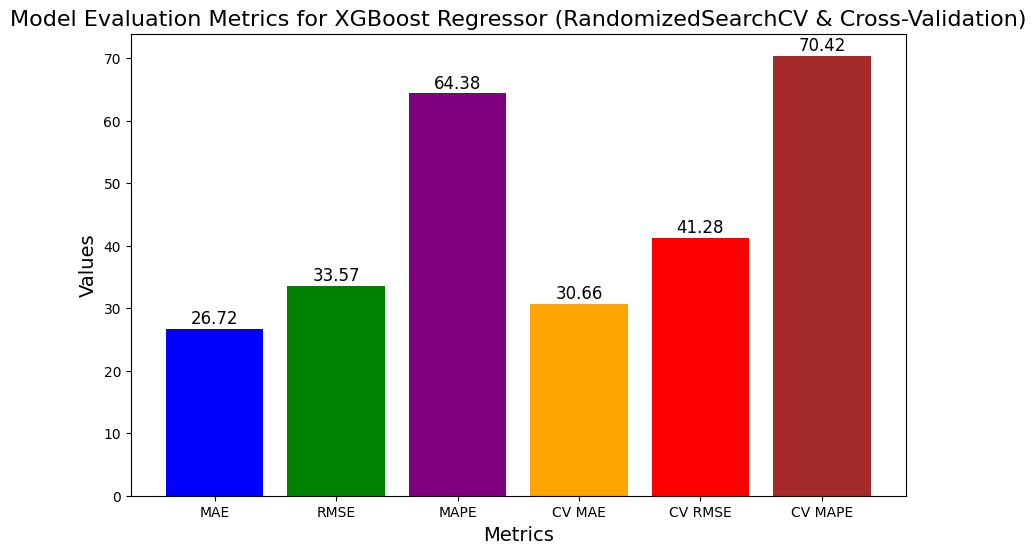

In [ ]:
# Data untuk visualisasi
metrics_xgb = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values_xgb = [xgb_mae_random, xgb_rmse_random, xgb_mape_random, -cv_mae_xgb.mean(), -cv_rmse_xgb.mean(), -cv_mape_xgb.mean()]

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
bars_xgb = plt.bar(metrics_xgb, values_xgb, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Menambahkan judul dan label
plt.title("Model Evaluation Metrics for XGBoost Regressor (RandomizedSearchCV & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Menampilkan nilai di atas setiap bar
for bar in bars_xgb:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Menampilkan plot
plt.show()

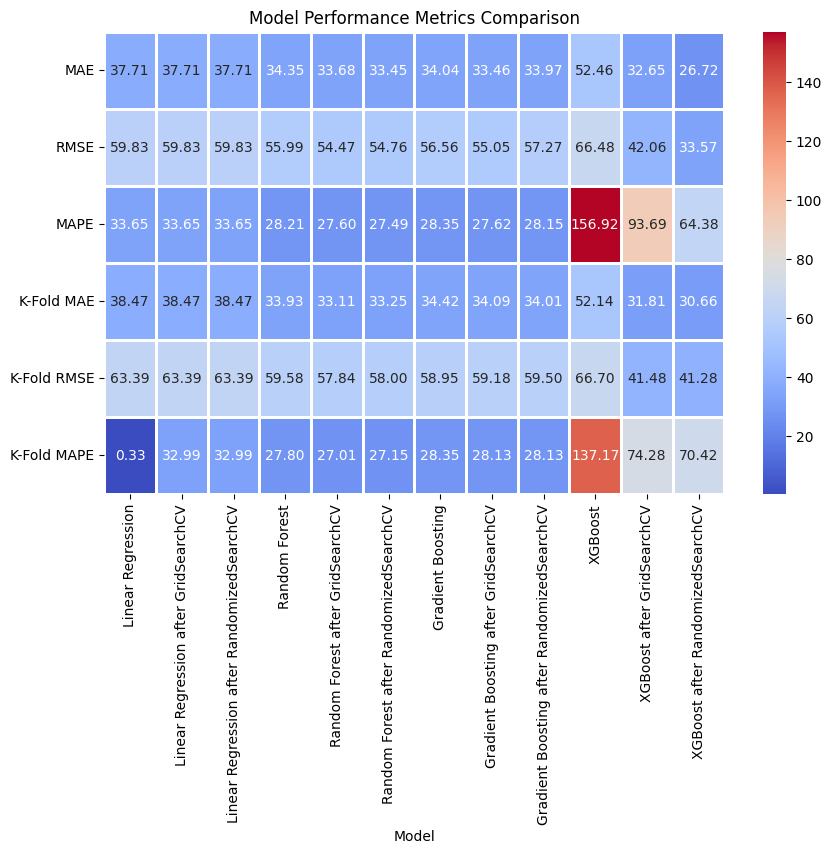

,Model,MAE,RMSE,MAPE,K-Fold MAE,K-Fold RMSE,K-Fold MAPE
0,Linear Regression,37.713188,59.832247,33.649495,38.471293,63.387192,0.329877
1,Linear Regression after GridSearchCV,37.713188,59.832247,33.649495,38.471293,63.387192,32.987738
2,Linear Regression after RandomizedSearchCV,37.713188,59.832247,33.649495,38.471293,63.387192,32.987738
3,Random Forest,34.351335,55.994131,28.211648,33.928351,59.578931,27.801536
4,Random Forest after GridSearchCV,33.676381,54.470963,27.599320,33.107574,57.842435,27.013265
5,Random Forest after RandomizedSearchCV,33.445738,54.755015,27.485758,33.251294,57.998584,27.152343
6,Gradient Boosting,34.035148,56.562800,28.352819,34.422907,58.954503,28.350033
7,Gradient Boosting after GridSearchCV,33.460888,55.048912,27.620444,34.089308,59.178344,28.126753
8,Gradient Boosting after RandomizedSearchCV,33.966378,57.268041,28.145474,34.006454,59.504792,28.126753
9,XGBoost,52.458160,66.482590,156.920233,52.135694,66.701204,137.170069


In [ ]:
import pandas as pd

# Data for the metrics
data = {
    'Model': [
        'Linear Regression', 'Linear Regression after GridSearchCV', 'Linear Regression after RandomizedSearchCV',
        'Random Forest', 'Random Forest after GridSearchCV', 'Random Forest after RandomizedSearchCV',
        'Gradient Boosting', 'Gradient Boosting after GridSearchCV', 'Gradient Boosting after RandomizedSearchCV',
        'XGBoost', 'XGBoost after GridSearchCV', 'XGBoost after RandomizedSearchCV'
    ],
    'MAE': [
        37.71318839993596, 37.71318839993526, 37.71318839993579,
        34.35133507853403, 33.67638104936105, 33.445738441357584,
        34.035147618961986, 33.46088826077383, 33.9663784779764,
        52.458159674465925, 32.65097169840454, 26.718842467349464
    ],
    'RMSE': [
        59.832246561096866, 59.83224656109669, 59.8322465610968,
        55.99413128139515, 54.470963423590234, 54.755015472291575,
        56.56280016452461, 55.048912163143925, 57.268041111168905,
        66.48258957841547, 42.05800605309765, 33.57130779886337
    ],
    'MAPE': [
        33.6494953498286, 33.649495349827276, 33.64949534982835,
        28.211648007488705, 27.59932047918739, 27.485757925088595,
        28.352818809615627, 27.620443500383967, 28.14547376941666,
        156.9202330079311, 93.6927642067836, 64.3848057609671
    ],
    'K-Fold MAE': [
        38.47129291787567, 38.47129291787586, 38.47129291787583,
        33.92835113090607, 33.10757445804161, 33.25129424187045,
        34.42290728823777, 34.08930755001347, 34.00645439721332,
        52.13569398526986, 31.81140554694097, 30.662093095439985
    ],
    'K-Fold RMSE': [
        63.38719197872223, 63.38719197872298, 63.38719197872301,
        59.578930934275625, 57.84243525628126, 57.99858406694265,
        58.95450339508612, 59.17834439955683, 59.50479223510767,
        66.70120386335752, 41.4813526361177, 41.27682254496496
    ],
    'K-Fold MAPE': [
        0.32987737988299953, 32.9877379883, 32.98773798829999,
        27.80153574961824, 27.013264519771546, 27.152343195302016,
        28.350032987064576, 28.126753108021354, 28.126753108021354,
        137.17006937404818, 74.28161928514146, 70.41718676764431
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the table
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index('Model').T, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Model Performance Metrics Comparison')
plt.show()

df


Evaluasi Model:

  MAE: Menunjukkan rata-rata kesalahan absolut antara nilai yang diprediksi dan nilai aktual. Semakin kecil MAE, semakin baik model.

  RMSE: Mengukur akar kuadrat dari rata-rata kesalahan kuadrat. Semakin kecil RMSE, semakin baik model.

  MAPE: Mengukur kesalahan relatif dalam bentuk persentase. Semakin kecil MAPE, semakin baik model.

Hasil Perbandingan:

  1. Linear Regression:

        MAE: 37.71

        RMSE: 59.83

        MAPE: 33.65

  2. Random Forest:

        MAE: 34.35

        RMSE: 55.99

        MAPE: 28.21

  3. Gradient Boosting:

        MAE: 34.04

        RMSE: 56.56

        MAPE: 28.35

  4. XGBoost:

        MAE: 52.46

        RMSE: 66.48

        MAPE: 156.92

Model Terbaik Berdasarkan Hasil:

  Random Forest adalah model terbaik berdasarkan MAE, RMSE, dan MAPE. Ini memiliki MAE terkecil (34.35), RMSE terkecil (55.99), dan MAPE terkecil (28.21), yang menunjukkan bahwa Random Forest menghasilkan prediksi harga yang lebih akurat daripada model lainnya.

  XGBoost memiliki nilai MAE dan RMSE yang lebih tinggi, serta MAPE yang sangat tinggi, yang menandakan bahwa model ini kurang akurat dibandingkan yang lainnya.

Kesimpulan:

  Random Forest setelah GridSearchCV atau RandomizedSearchCV tampaknya memberikan hasil terbaik berdasarkan kinerja pada semua metrik utama.